In [166]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [167]:
out_dir = "../figures/dpapt/small"
dpapt_dir = "../results/dpapt/t_drive_small"
original_dataset = "../sample_dbs/t_drive_small.csv"
os.makedirs(out_dir, exist_ok=True)
df = pd.read_csv(f"{dpapt_dir}/stats.csv")

In [168]:
# hua baseline
hua_dir = "../results/hua/small"
df_hua = pd.read_csv(f"{hua_dir}/stats.csv")
df_hua = df_hua[df_hua["tu"] <= df["tu"].max()]
df_hua["timestamp"] = df_hua["tu"] - df_hua["tl"]

In [169]:
df["timespan"] = df["tu"] - df["tl"]
n_runs = df["run"].max() + 1

og_df = pd.read_csv(original_dataset)
true_size = len(og_df["id"].unique())

sns.set_theme(style="whitegrid")

In [170]:
def plot_size_vs_timespan(df, df_hua, size_type, size_name):
    plt.figure(figsize=(10, 6))

    df_plot = df[df["eps"].isin([1, 2, 3, 4])]

    # Plot DPAPT runs
    sns.lineplot(
        data=df_plot,
        x="timespan",
        y=size_type,
        hue="eps",
        style="eps",
        markers=True,
        dashes=False,
        marker="o",
        palette="tab10",
        legend="full",
        linewidth=2,
    )

    sns.lineplot(
        data=df_hua[df_hua["eps"] == 2],
        x="timestamp",
        y=size_type,
        color="black",
        linestyle="--",
        marker="X",
        label=f"Hua Baseline (ε=2, m=60, ɸ=100)",
        linewidth=2,
    )

    plt.axhline(true_size, linestyle="--", color="gray", label="Original Dataset Size")

    # Set x-ticks to discrete timespans
    plt.xticks(ticks=sorted(df["timespan"].unique()))

    plt.title(f"{size_name} vs. Timespan for Different ε (DPAPT) with Hua Baseline")
    plt.xlabel("Timespan")
    plt.ylabel("Trajectory Count")
    plt.legend(title="Epsilon / Method")
    plt.tight_layout()

    # Save the figure
    fname = f"{out_dir}/{size_name.replace(' ', '_')}_vs_timespan_with_hua_baseline.svg"
    plt.savefig(fname, format="svg")
    plt.show()


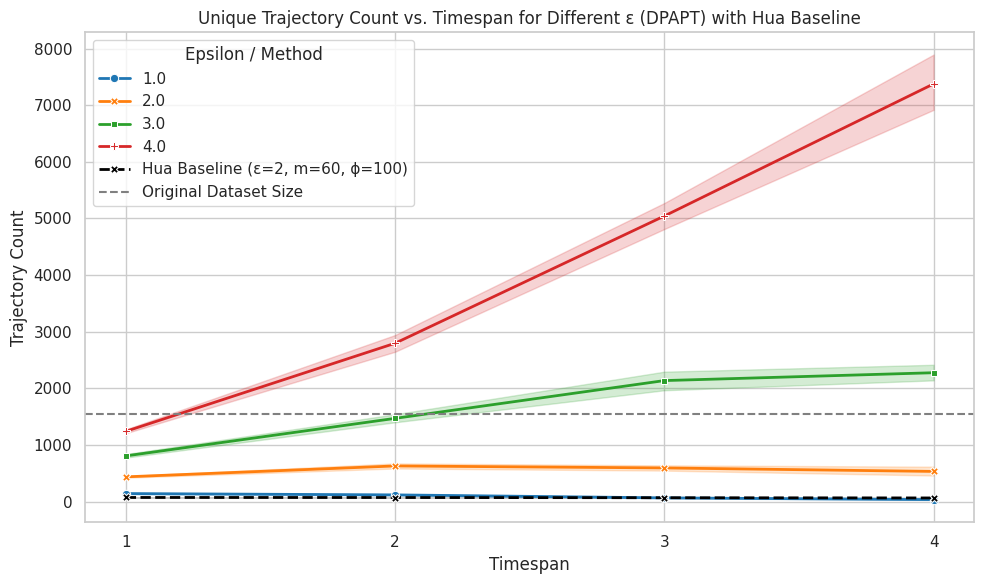

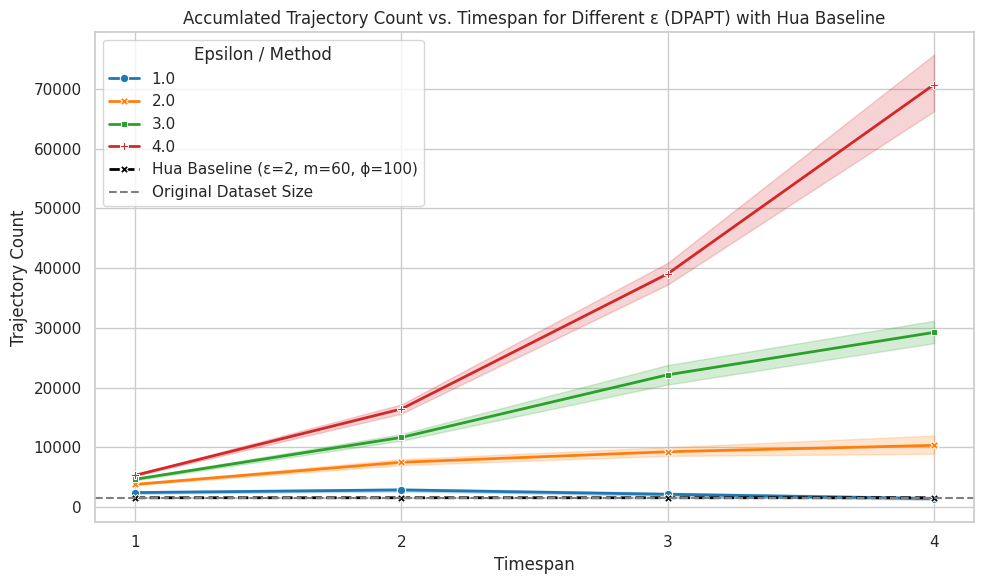

In [171]:

df_less_eps = df[df["eps"].isin([1, 2, 3, 4])]

# Plot size_unique vs timespan
plot_size_vs_timespan(df, df_hua, "size_unique", "Unique Trajectory Count")
plot_size_vs_timespan(df, df_hua, "size_acc", "Accumlated Trajectory Count")


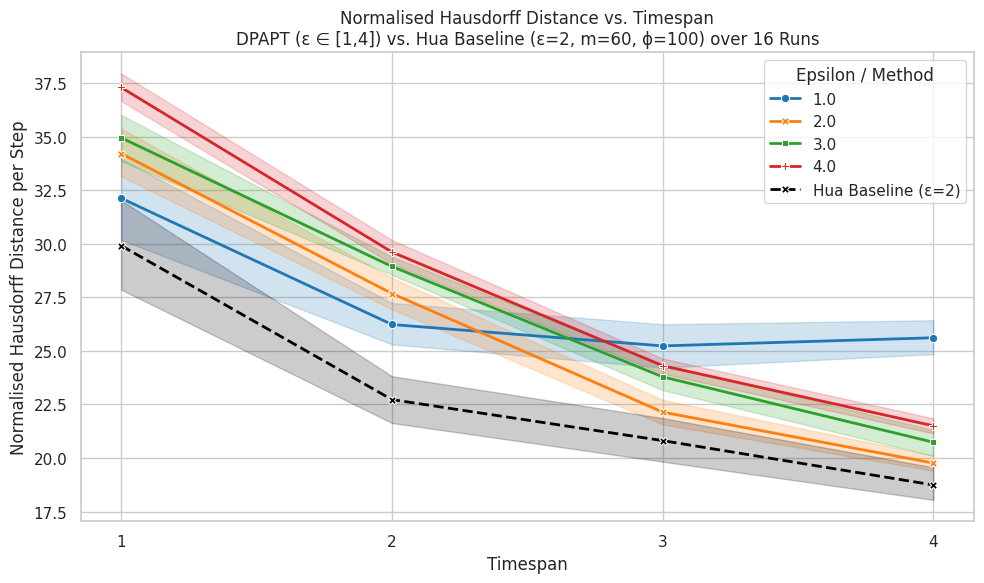

In [173]:
def plot_normalized_hausdorff_with_baseline(df, df_hua, n_runs):
    # Filter valid entries
    df_valid = df[df["hausdorff"] > 0].copy()
    df_valid["hausdorff_norm"] = df_valid["hausdorff"] / (df_valid["timespan"] + 1)

    # Only show eps in main set that are also in Hua baseline
    df_plot = df_valid[df_valid["eps"].isin([1, 2, 3, 4])]

    # Normalise hua distances by timespan + 1
    df_hua_valid = df_hua[df_hua["hausdorff"] > 0].copy()
    df_hua_valid["hausdorff_norm"] = df_hua_valid["hausdorff"] / (df_hua_valid["timestamp"] + 1)

    plt.figure(figsize=(10, 6))

    # Plot DPAPT results
    sns.lineplot(
        data=df_plot,
        x="timespan",
        y="hausdorff_norm",
        hue="eps",
        style="eps",
        markers=True,
        dashes=False,
        marker="d",
        palette="tab10",
        legend="full",
        linewidth=2,
    )

    # Plot Hua baseline only for ε = 2
    df_hua_eps2 = df_hua_valid[df_hua_valid["eps"] == 2]
    sns.lineplot(
        data=df_hua_eps2,
        x="timestamp",
        y="hausdorff_norm",
        color="black",
        linestyle="--",
        marker="X",
        label="Hua Baseline (ε=2)",
        linewidth=2,
    )

    plt.xticks(ticks=sorted(df_plot["timespan"].unique()))
    plt.title(f"Normalised Hausdorff Distance vs. Timespan\nDPAPT (ε ∈ [1,4]) vs. Hua Baseline (ε=2, m=60, ɸ=100) over {n_runs} Runs")
    plt.xlabel("Timespan")
    plt.ylabel("Normalised Hausdorff Distance per Step")
    plt.legend(title="Epsilon / Method")
    plt.tight_layout()

    # Save figure
    plt.savefig(f"{out_dir}/hausdorff_normalised_vs_timespan_with_hua_baseline.svg", format="svg")
    plt.show()

# Plot normalised Hausdorff distance with baseline
plot_normalized_hausdorff_with_baseline(df, df_hua, n_runs)

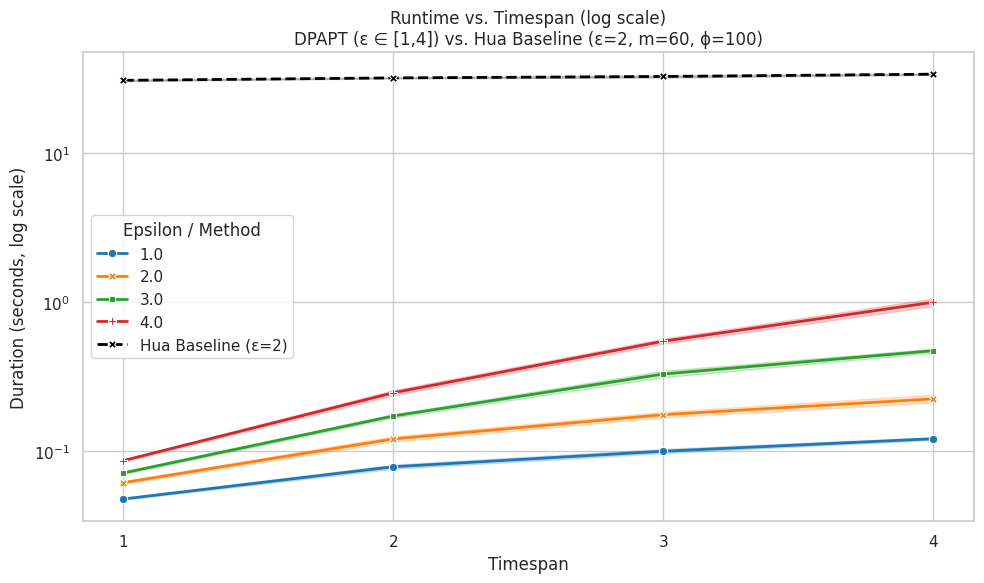

In [153]:
def plot_runtime_vs_timespan_with_baseline(df, df_hua):
    plt.figure(figsize=(10, 6))

    # Filter and prepare data
    df_plot = df[df["eps"].isin([1, 2, 3, 4])].copy()
    df_hua_plot = df_hua[df_hua["eps"] == 2].copy()
    df_hua_plot.rename(columns={"timestamp": "timespan"}, inplace=True)

    sns.lineplot(
        data=df_plot,
        x="timespan",
        y="duration",
        hue="eps",
        style="eps",
        markers=True,
        dashes=False,
        marker="o",
        palette="tab10",
        legend="full",
        linewidth=2,
    )

    sns.lineplot(
        data=df_hua_plot,
        x="timespan",
        y="duration",
        color="black",
        linestyle="--",
        marker="X",
        label="Hua Baseline (ε=2)",
        linewidth=2,
    )

    plt.yscale("log")

    plt.xticks(ticks=sorted(df_plot["timespan"].unique()))
    plt.title("Runtime vs. Timespan (log scale)\nDPAPT (ε ∈ [1,4]) vs. Hua Baseline (ε=2, m=60, ɸ=100)")
    plt.xlabel("Timespan")
    plt.ylabel("Duration (seconds, log scale)")
    plt.legend(title="Epsilon / Method")
    plt.tight_layout()

    plt.savefig(f"{out_dir}/runtime_vs_timespan_with_hua_baseline_log.svg", format="svg")
    plt.show()

# Plot runtime vs timespan with baseline
plot_runtime_vs_timespan_with_baseline(df, df_hua)

In [154]:
dpapt_indiv_hd = pd.read_csv(f"{dpapt_dir}/indiv_hd.csv")
hua_indiv_hd = pd.read_csv(f"{hua_dir}/indiv_hd.csv")

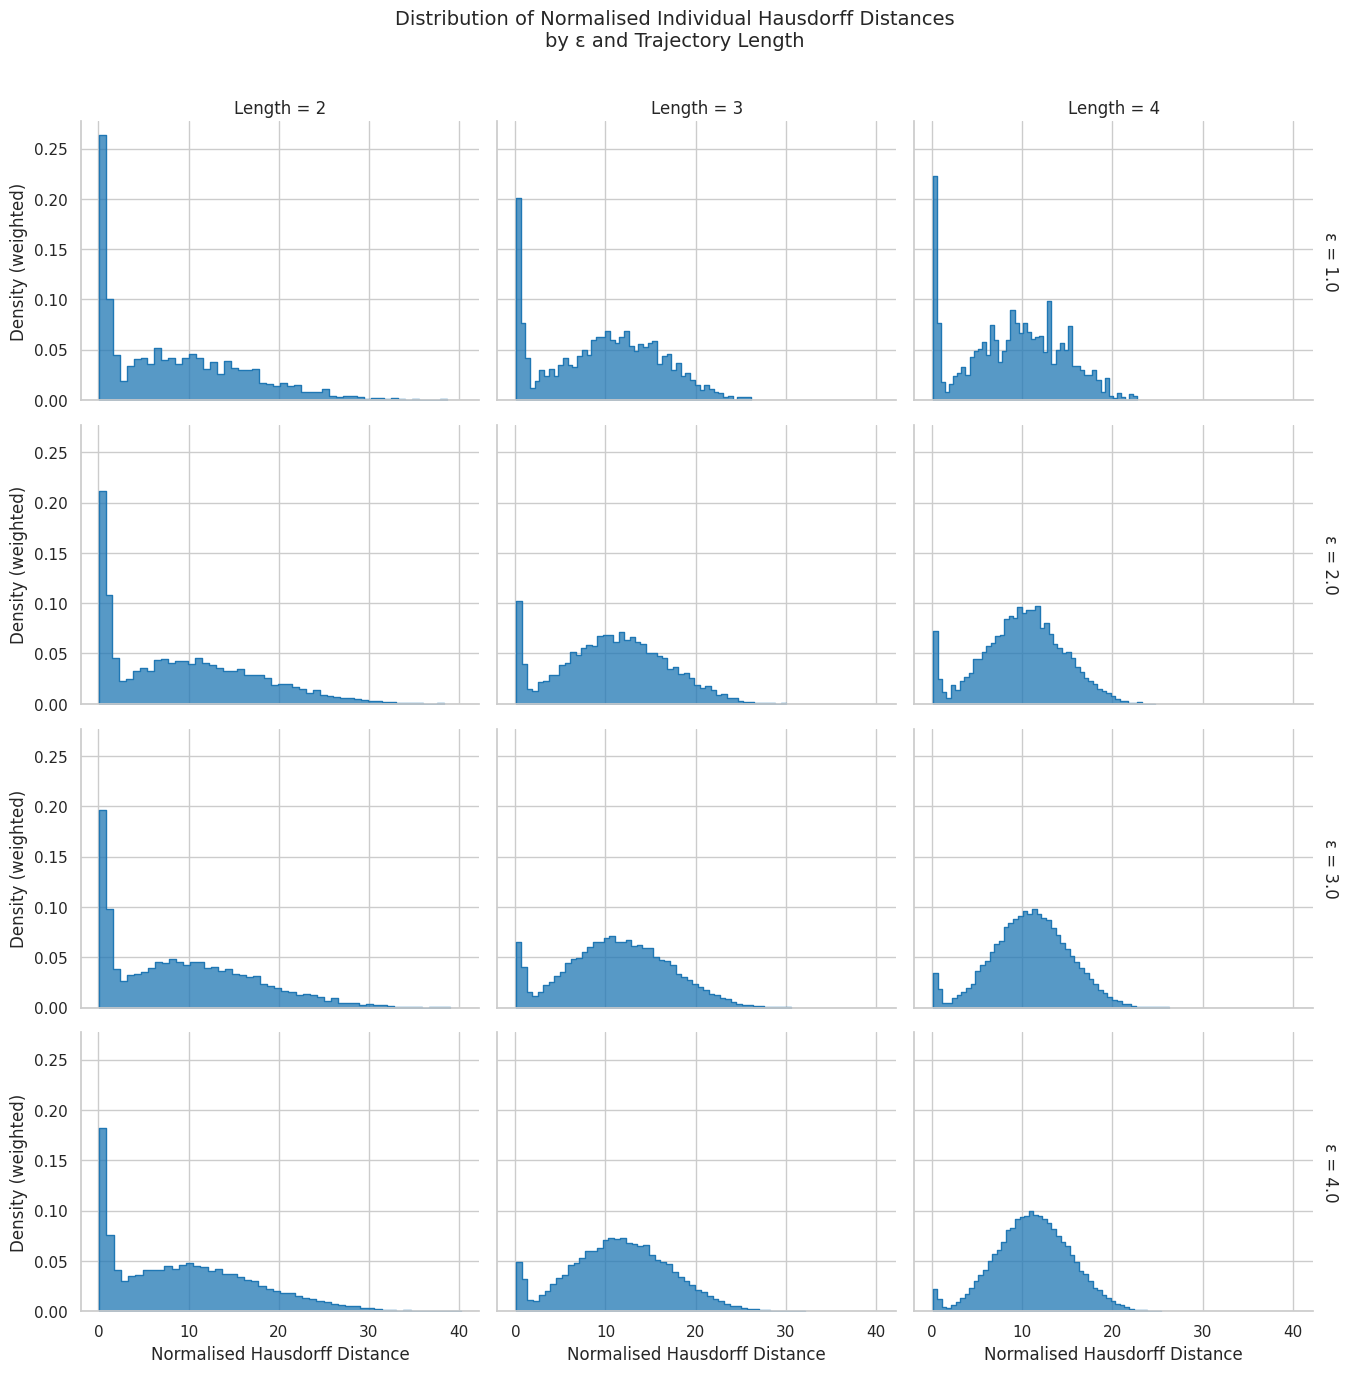

In [164]:
def plot_faceted_hausdorff_by_eps_and_interval(df, eps_values=[1, 2, 3, 4], interval_sizes=[1, 2, 3]):
    df_filtered = df[df["eps"].isin(eps_values)].copy()
    df_filtered["timespan"] = df_filtered["tu"] - df_filtered["tl"]
    df_filtered = df_filtered[df_filtered["timespan"].isin(interval_sizes)]
    df_filtered["hausdorff_norm"] = df_filtered["individual_hausdorff"] / (df_filtered["timespan"] + 1)

    # Make categorical for better FacetGrid labels
    df_filtered["ε"] = df_filtered["eps"].astype(str)
    df_filtered["Interval Size"] = (df_filtered["timespan"] + 1).astype(str)

    g = sns.FacetGrid(
        df_filtered,
        row="ε",
        col="Interval Size",
        margin_titles=True,
        height=3.5,
        aspect=1.3,
        sharex=True,
        sharey=True
    )

    g.map_dataframe(
        sns.histplot,
        x="hausdorff_norm",
        weights="count",
        stat="density",
        bins=50,
        element="step",
        fill=True,
        color="tab:blue"
    )

    g.set_axis_labels("Normalised Hausdorff Distance", "Density (weighted)")
    g.set_titles(row_template="ε = {row_name}", col_template="Length = {col_name}")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle("Distribution of Normalised Individual Hausdorff Distances\nby ε and Trajectory Length", fontsize=14)

    plt.savefig(f"{dir}/indiv_hausdorff_distribution_faceted.svg", format="svg")
    plt.show()

# Plot faceted Hausdorff by ε and interval size
plot_faceted_hausdorff_by_eps_and_interval(dpapt_indiv_hd, eps_values=[1, 2, 3, 4], interval_sizes=[1, 2, 3])


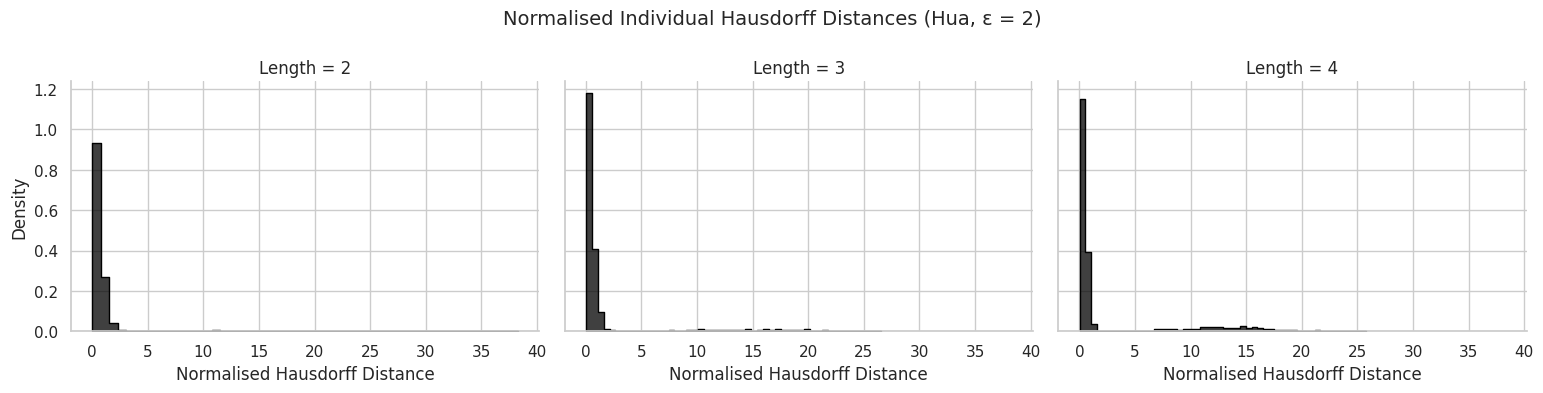

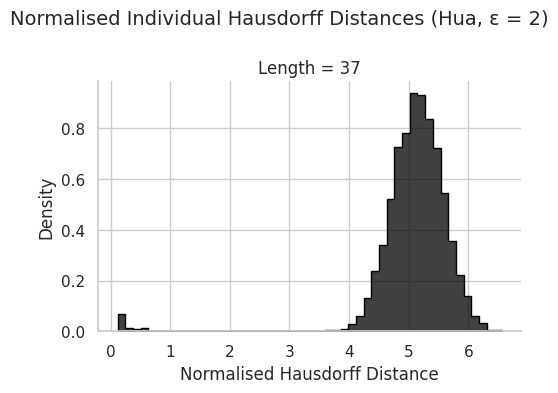

In [156]:
def plot_faceted_hausdorff_hua(hua_df, interval_sizes=[1, 2, 3]):
    # Filter Hua ε=2 and selected intervals
    hua = hua_df[(hua_df["eps"] == 2)].copy()
    hua["timespan"] = hua["tu"] - hua["tl"]
    hua = hua[hua["timespan"].isin(interval_sizes)]
    hua["hausdorff_norm"] = hua["individual_hausdorff"] / (hua["timespan"] + 1)
    hua["Interval Size"] = (hua["timespan"] + 1).astype(str)

    g = sns.FacetGrid(
        hua,
        col="Interval Size",
        height=4,
        aspect=1.3,
        sharey=True,
        margin_titles=True,
    )

    g.map_dataframe(
        sns.histplot,
        x="hausdorff_norm",
        stat="density",
        bins=50,
        element="step",
        fill=True,
        color="black",
    )

    g.set_titles(col_template="Length = {col_name}")
    g.set_axis_labels("Normalised Hausdorff Distance", "Density")
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle("Normalised Individual Hausdorff Distances (Hua, ε = 2)", fontsize=14)

    plt.savefig(f"{dir}/hua_indiv_hausdorff_distribution_faceted.svg", format="svg")
    plt.show()

# Plot faceted Hausdorff for Hua
plot_faceted_hausdorff_hua(hua_indiv_hd, interval_sizes=[1,2,3])
plot_faceted_hausdorff_hua(hua_indiv_hd, interval_sizes=[36])

In [157]:
dpapt_qd = pd.read_csv(f"{dpapt_dir}/query_distortion.csv")


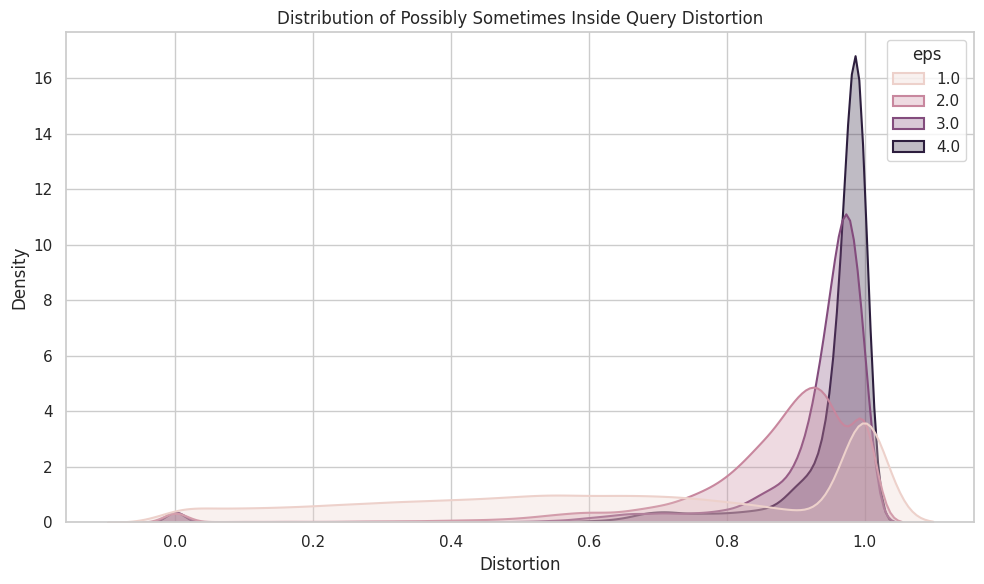

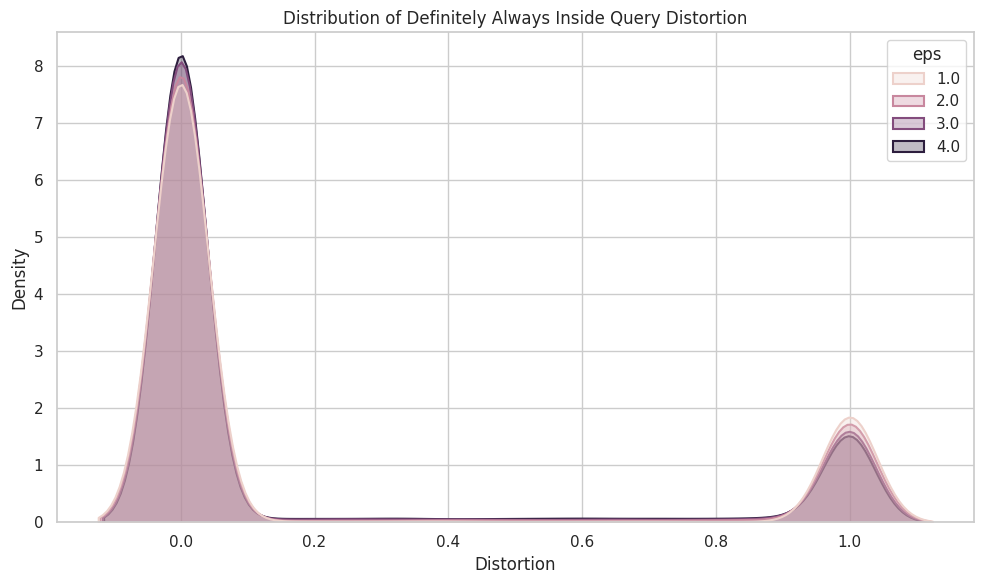

In [158]:
def plot_query_distortion_distributions(df):
    df_filtered = df[df["eps"].isin([1, 2, 3, 4])].copy()
    df_filtered["timespan"] = df_filtered["tu"] - df_filtered["tl"]

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_filtered, x="psi_distortion", hue="eps", common_norm=False, fill=True, linewidth=1.5, alpha=0.3)
    plt.title("Distribution of Possibly Sometimes Inside Query Distortion")
    plt.xlabel("Distortion")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{dir}/psi_query_distortion_distribution.svg", format="svg")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df_filtered, x="dai_distortion", hue="eps", common_norm=False, fill=True, linewidth=1.5, alpha=0.3)
    plt.title("Distribution of Definitely Always Inside Query Distortion")
    plt.xlabel("Distortion")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.savefig(f"{dir}/dai_query_distortion_distribution.svg", format="svg")
    plt.show()

plot_query_distortion_distributions(dpapt_qd)

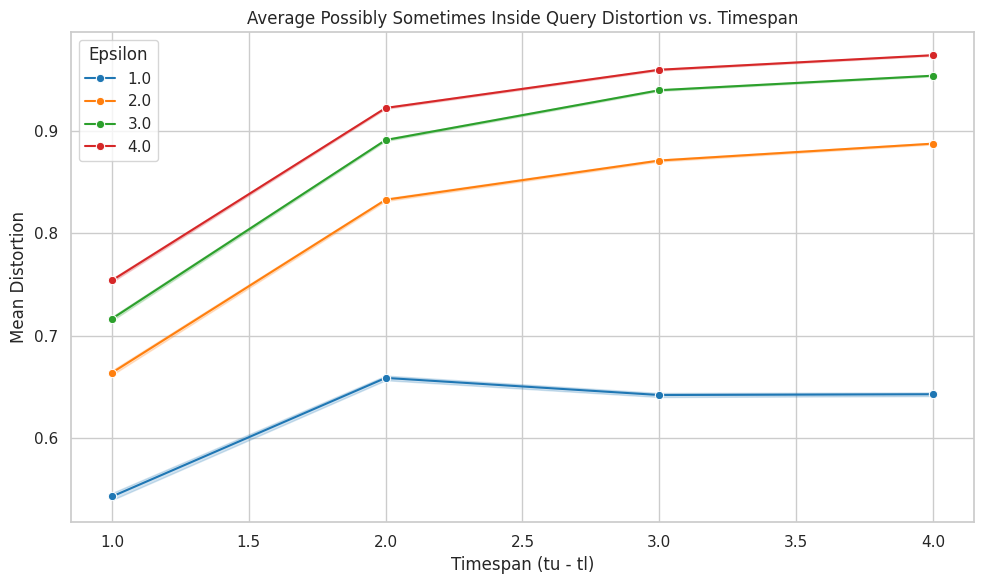

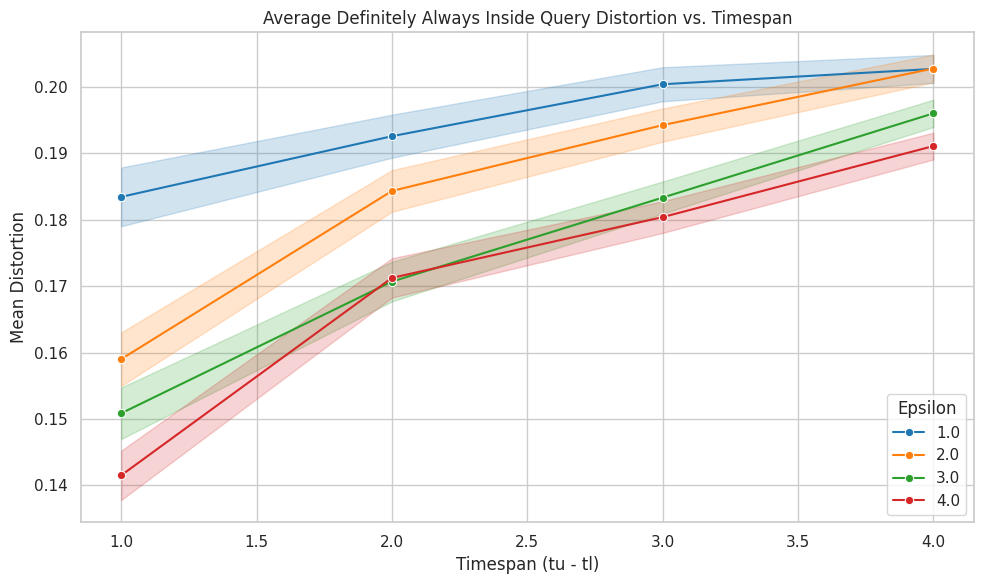

In [159]:
def plot_distortion_vs_timespan(df):
    df = df[df["eps"].isin([1, 2, 3, 4])].copy()
    df["timespan"] = df["tu"] - df["tl"]

    for kind, label in [("psi_distortion", "Possibly Sometimes Inside"), ("dai_distortion", "Definitely Always Inside")]:
        plt.figure(figsize=(10, 6))
        sns.lineplot(
            data=df,
            x="timespan",
            y=kind,
            hue="eps",
            errorbar="se",
            marker="o",
            palette="tab10",
        )
        plt.title(f"Average {label} Query Distortion vs. Timespan")
        plt.xlabel("Timespan (tu - tl)")
        plt.ylabel("Mean Distortion")
        plt.legend(title="Epsilon")
        plt.tight_layout()
        plt.savefig(f"{dir}/avg_{kind}_vs_timespan.svg", format="svg")
        plt.show()

plot_distortion_vs_timespan(dpapt_qd)